# 01. User Animelist Dataset

アニメのタイトル・ジャンル・発表年などの情報が含まれたデータと、実際に投稿されたレーティングのデータをもとに分析を行っていく。

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib as mpl

データのダウンロードに使ったコード

In [2]:
# import kagglehub

# Download latest version
# path = kagglehub.dataset_download("tavuksuzdurum/user-animelist-dataset")

# print("Path to dataset files:", path)

表示したグラフ画像の保存に用いるコード

In [3]:
# グラフ画像保存用パラメータ
mpl.rcParams["figure.dpi"] = 80
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["savefig.bbox"] = "tight"
mpl.rcParams["figure.figsize"] = (8, 6)
output_dir = Path("..", "output")

データの読み込み

In [4]:
animes = pd.read_csv(Path("..", "data", "raw", "animes.csv"))
ratings = pd.read_csv(Path("..", "data", "raw", "ratings.csv"))

データの概形を確認する

In [5]:
animes.head()

,animeID,title,alternative_title,type,year,score,episodes,mal_url,sequel,image_url,genres,genres_detailed
0,1,Howl's Moving Castle,Howl no Ugoku Shiro,MOVIE,2004,8.41,1,https://myanimelist.net/anime/431,False,https://cdn.myanimelist.net/images/anime/1470/...,"['Adventure', 'Award Winning', 'Drama', 'Fanta...","['action', 'adventure', 'age gap', 'air force'..."
1,2,Death Note,NaN,TV,2006,8.63,37,https://myanimelist.net/anime/1535,False,https://cdn.myanimelist.net/images/anime/1079/...,"['Supernatural', 'Suspense']","['achronological order', 'acting', 'adapted in..."
2,3,Problem Children Are Coming from Another World...,Mondaiji-tachi ga Isekai kara Kuru Sou desu yo?,TV,2013,7.42,10,https://myanimelist.net/anime/15315,False,https://cdn.myanimelist.net/images/anime/12/43...,"['Action', 'Comedy', 'Fantasy']","['action', 'alternative world', 'anthropomorph..."
3,4,BTOOOM!,Btooom!,TV,2012,7.34,12,https://myanimelist.net/anime/14345,False,https://cdn.myanimelist.net/images/anime/4/409...,"['Action', 'Sci-Fi', 'Suspense']","['achronological order', 'action', 'adventure'..."
4,5,Sword Art Online,NaN,TV,2012,7.5,25,https://myanimelist.net/anime/11757,False,https://cdn.myanimelist.net/images/anime/11/39...,"['Action', 'Adventure', 'Fantasy', 'Romance']","['action', 'action drama', 'adventure', 'alter..."


`animes`データセットには、以下の情報が含まれている:

- Title(作品のタイトル)
- Year of release(発表された年)
- Episode Count(エピソード数)
- Type (発表された形式。テレビアニメ、映画等)
- Score (投稿された評価の平均点)
- Image URL (アニメのビジュアルイメージのurl)
- MyAnimeList URL(該当作品のレビューページ)
- Genres(ジャンル)
- Detailed Genres(サブジャンル)

In [6]:
animes.shape

(20237, 12)

In [7]:
animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20237 entries, 0 to 20236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   animeID            20237 non-null  int64 
 1   title              20237 non-null  object
 2   alternative_title  8676 non-null   object
 3   type               20237 non-null  object
 4   year               20237 non-null  object
 5   score              20237 non-null  object
 6   episodes           20237 non-null  int64 
 7   mal_url            20237 non-null  object
 8   sequel             20237 non-null  bool  
 9   image_url          20237 non-null  object
 10  genres             20237 non-null  object
 11  genres_detailed    20237 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 1.7+ MB


2万タイトルもの作品が存在している事がこのデータから分かる。<br>
`alternative_title`、代替タイトル以外には、特に欠損値も無い。

続いてレーティングのデータ

In [8]:
ratings.head()

,userID,animeID,rating
0,1,1,10
1,1,2,10
2,1,3,7
3,1,4,10
4,1,5,10


In [9]:
ratings.shape

(148170496, 3)

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148170496 entries, 0 to 148170495
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   userID   int64
 1   animeID  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 3.3 GB


約1億5千万件もの評価データが格納されている事が分かった。<br>
メモリ使用量は3GB。

## animesデータセット
内容を詳しく確認していく。

In [11]:
animes.columns

Index(['animeID', 'title', 'alternative_title', 'type', 'year', 'score',
       'episodes', 'mal_url', 'sequel', 'image_url', 'genres',
       'genres_detailed'],
      dtype='object')

#### アニメのビジュアル
`image_url`で表示できるビジュアルを確認する。

In [12]:
url = animes["image_url"].iloc[0]

In [13]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))

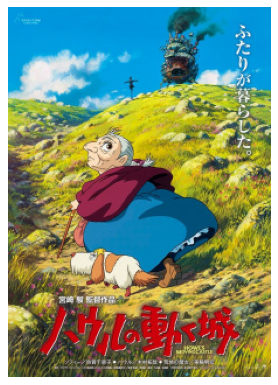

In [14]:
plt.imshow(img)
plt.axis("off")
plt.show()

#### アニメの形式
続いて、アニメが放送される形式を表す`type`列を確認する。<br>
形式とは、その作品が毎週テレビ放送されていたのか、劇場版で公開されていたのか、といった違いを表すもの。

In [15]:
anime_types = animes["type"].value_counts().sort_values(ascending=False)

In [16]:
anime_types

type
TV         5766
SPECIAL    4847
OVA        3661
MOVIE      3250
ONA        2713
Name: count, dtype: int64

※ 
ONA:Original Net Anime。 Webアニメを指す。<br>
OVAは、劇場公開やテレビ放送を前提とせず、ビデオソフトとして直接販売されるアニメーション作品。<br>
スペシャルとは、例えば「1時間スペシャル」のような、通常のテレビアニメシリーズとは別枠で編成される作品を指す。

放送形式の割合をざっくりと可視化してみる。

In [17]:
anime_types_normed = ((anime_types / anime_types.sum()) * 100).apply(np.floor)

In [18]:
anime_types_normed  # パーセンテージはこう

type
TV         28.0
SPECIAL    23.0
OVA        18.0
MOVIE      16.0
ONA        13.0
Name: count, dtype: float64

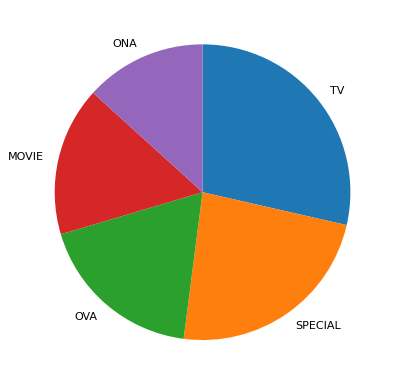

In [19]:
plt.pie(x=anime_types_normed, labels=anime_types.index, startangle=90, counterclock=False)
plt.savefig(output_dir / "01_Broadcast_Format_Ratio.png")
plt.show()

#### MyAnimeList URL
`mal_url`とは、海外のアニメレビューサイトのことのようだ。それぞれの作品のレビューのページのURLが置かれている。

In [20]:
animes["mal_url"].iloc[0]  # レビューサイトのurlのようだ。

'https://myanimelist.net/anime/431'

#### ジャンル
Pythonのリストのような形式の文字列で、1つの作品に対して複数のジャンル情報が格納されている。

In [21]:
animes["genres"].head(10)

0    ['Adventure', 'Award Winning', 'Drama', 'Fanta...
1                         ['Supernatural', 'Suspense']
2                      ['Action', 'Comedy', 'Fantasy']
3                     ['Action', 'Sci-Fi', 'Suspense']
4        ['Action', 'Adventure', 'Fantasy', 'Romance']
5            ['Adventure', 'Award Winning', 'Fantasy']
6    ['Action', 'Adventure', 'Award Winning', 'Fant...
7                   ['Action', 'Adventure', 'Fantasy']
8                      ['Action', 'Romance', 'Sci-Fi']
9    ['Award Winning', 'Mystery', 'Romance', 'Sci-F...
Name: genres, dtype: object

In [22]:
animes["genres"].tail(10)

20227              ['Action']
20228    ['Action', 'Sci-Fi']
20229              ['Action']
20230     ['Comedy', 'Ecchi']
20231    ['Action', 'Comedy']
20232             ['Fantasy']
20233             ['Fantasy']
20234             ['Fantasy']
20235                      []
20236                      []
Name: genres, dtype: object

**リストの中身が空白なので、実質的には欠損値**である値が存在している事が分かる。

In [23]:
(animes["genres"] == "[]").sum()

np.int64(256)

#### リリース年
何年にそのアニメが発表されたか。

In [24]:
animes["year"].head()

0    2004
1    2006
2    2013
3    2012
4    2012
Name: year, dtype: object

可視化を試みたところ`"?"`のような文字列が入ってしまっている事が判明した。これは実質欠損値として扱ってよい。

In [25]:
(animes["year"] == "?").sum()

np.int64(136)

`"?"`以外にも、数値以外の値が含まれていないか念のため確認する。

In [26]:
# isdigitで文字列が数字化を判定、np.logical_not関数でbool値を反転。
animes["year"].str.isdigit().apply(np.logical_not).sum()

np.int64(136)

`"?"`以外は全部数字が入っている事が分かった。

ここからは、一旦欠損値を取り除いたコピーを作成し、ヒストグラムでデータの概要を確認する。

In [27]:
# drop関数には、削除してほしい行のインデックスを渡せばよい。
animes_year = animes.drop(
    animes[animes["year"].str.isdigit().apply(np.logical_not)].index)["year"]

In [28]:
animes_year

0        2004
1        2006
2        2013
3        2012
4        2012
         ... 
20232    2005
20233    2023
20234    2018
20235    2007
20236    2008
Name: year, Length: 20101, dtype: object

In [29]:
animes_year.shape

(20101,)

In [30]:
animes_year.str.isdigit().sum()

np.int64(20101)

In [31]:
animes_year = pd.to_datetime(animes_year, format="%Y").dt.year

In [32]:
animes_year

0        2004
1        2006
2        2013
3        2012
4        2012
         ... 
20232    2005
20233    2023
20234    2018
20235    2007
20236    2008
Name: year, Length: 20101, dtype: int32

データのクリーニングが完了したので、ヒストグラムの描画に移る。

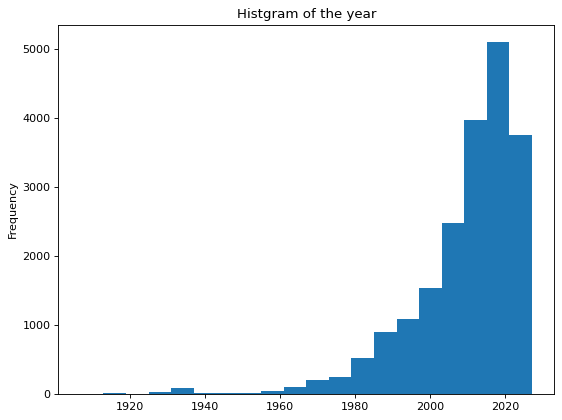

In [33]:
animes_year.plot.hist(bins=20, title="Histgram of the year")
plt.savefig(output_dir / "02_Histgram_of_the_year.png")
plt.show()

このヒストグラムによると、2020年以降から作品数が急激に増え始めている事が分かる。

#### 続編
`"sequel"`は続編の意。真偽値型で表現されている。

In [34]:
animes["sequel"].sum()

np.int64(1053)

続編に該当する作品は、全体の5%ほどにしか満たない。

#### スコア
欠損値が無いようだが、先ほどの`"year"`列のようなケースが考えられるので、確認する。

In [35]:
animes["score"]

0        8.41
1        8.63
2        7.42
3        7.34
4         7.5
         ... 
20232    4.95
20233       ?
20234       ?
20235    4.82
20236    4.68
Name: score, Length: 20237, dtype: object

念のため、`"?"`以外の欠損が無いかも調べ、それを弾いていく。

In [36]:
# 少数と見なすパターンの正規表現
pattern = r'^(\d+\.\d*|\d*\.\d+|\d+)$'

In [37]:
animes["score"].str.match(pattern)

0         True
1         True
2         True
3         True
4         True
         ...  
20232     True
20233    False
20234    False
20235     True
20236     True
Name: score, Length: 20237, dtype: bool

In [38]:
animes[animes["score"].str.match(pattern).apply(np.logical_not)]["score"].value_counts()

score
?    593
Name: count, dtype: int64

とりあえず、`"?"`しか無いようだ。

一度、欠損値を取り除いたコピーを作成し、概要を確認する。

In [39]:
anime_scores = animes["score"][animes["score"].str.match(pattern)]

In [40]:
anime_scores = anime_scores.astype(float)

In [41]:
anime_scores.head()

0    8.41
1    8.63
2    7.42
3    7.34
4    7.50
Name: score, dtype: float64

In [42]:
anime_scores.mean()

np.float64(6.315589492974953)

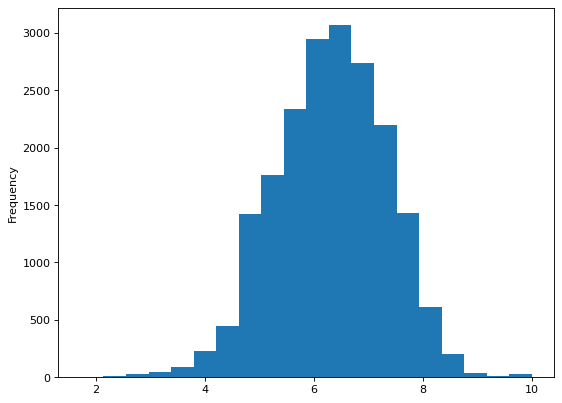

In [43]:
anime_scores.plot.hist(bins=20)
plt.savefig(output_dir / "03_Anime_Score_Histgram.png")
plt.show()

評価の平均点は、正規分布となっている事が分かる。

#### エピソード数
最後にエピソード数について確認する。

In [44]:
animes["episodes"].head()

0     1
1    37
2    10
3    12
4    25
Name: episodes, dtype: int64

In [45]:
animes["episodes"].isna().sum()

np.int64(0)

欠損値は無し。

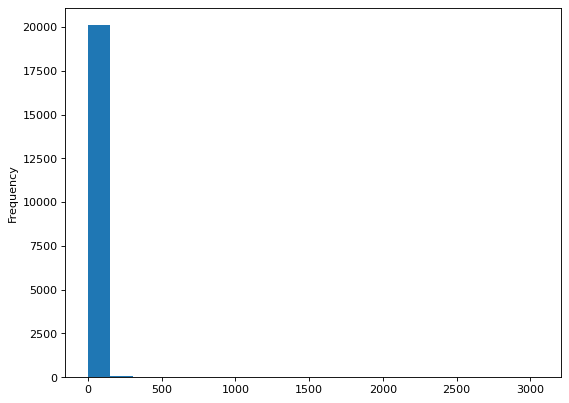

In [46]:
animes["episodes"].plot.hist(bins=20)
plt.savefig(output_dir / "04_Anime_Episodes_Histgram.png")
plt.show()

アニメ作品の中には、3000話を超えるような長寿番組がごく少数含まれているのだろう。

### データ概要
このページでは、データセットの概要について確認した。<br>
`animes`テーブルには、各アニメのタイトルやジャンル、エピソード数、ジャンルなどの属性情報が、`ratings`テーブルには、レビューサイトに実際に投稿されたスコアである評価情報が、それぞれ格納されている。2つのテーブルは、`animeID`によって紐づけられている。<br>
アニメ作品としては、2000年代以降になって非常に多くの作品が作られるようになった事が分かった。また、作品の中には、何千話という数のエピソードを含んでいるものもあると思われる。